In [13]:
import pandas as pd
import matplotlib.pyplot as plt

result_df = pd.read_csv("train_results/tunning_results_ALRk76VV.csv")
result_df.columns

Index(['train_id', 'emb_dim', 'h_dim', 'latent_dim', 'categorical_dim',
       'batch_size', 'save_model', 'initial_temp', 'min_temp', 'epochs',
       'anneal_rate', 'activation', 'model_name', 'current_epoch',
       'train_loss', 'kld', 'recon_loss'],
      dtype='object')

In [2]:
columns = ['emb_dim', 'h_dim', 'latent_dim', 'categorical_dim', 'activation']

grouped_df = result_df.groupby(columns).agg({'train_loss': 'min'})
grouped_df.reset_index().sort_values(["train_loss", "latent_dim"])

,emb_dim,h_dim,latent_dim,categorical_dim,activation,train_loss
31,512,512,32,2,gumbel,96.043434
32,512,1024,16,2,bc,103.721061
27,512,256,32,2,gumbel,104.189795
16,256,512,16,2,bc,104.905645
20,256,1024,16,2,bc,104.951406
28,512,512,16,2,bc,105.088224
33,512,1024,16,2,gumbel,105.464633
5,128,512,16,2,gumbel,106.248179
4,128,512,16,2,bc,106.424144
8,128,1024,16,2,bc,106.602033


In [8]:
emb_dim = 512
h_dim = 1024
latent_dim = 32
activation = 'bc'

df = result_df[(result_df['emb_dim'] == emb_dim) & (result_df['h_dim'] == h_dim) & (result_df['latent_dim'] == latent_dim) & (result_df['activation'] == activation)]
df.sort_values('current_epoch', ascending=False)#[['current_epoch', 'train_loss']]

,train_id,emb_dim,h_dim,latent_dim,categorical_dim,batch_size,save_model,initial_temp,min_temp,epochs,anneal_rate,activation,model_name,current_epoch,train_loss,kld,recon_loss
1199,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,49,130.578981,0.267589,130.311392
1198,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,48,126.199872,0.174633,126.025239
1197,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,47,123.515516,0.247876,123.267640
1196,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,46,125.322314,2.706965,122.615349
1195,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,45,127.919992,0.237781,127.682211
1194,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,44,122.568652,0.237194,122.331457
1193,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,43,120.888105,0.158712,120.729393
1192,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,42,128.954420,0.190629,128.763792
1191,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,41,122.371136,0.163821,122.207315
1190,tunning_23,512,1024,32,2,128,False,1.0,0.5,50,0.00003,bc,tunning_autoencoder,40,118.317441,0.172461,118.144980


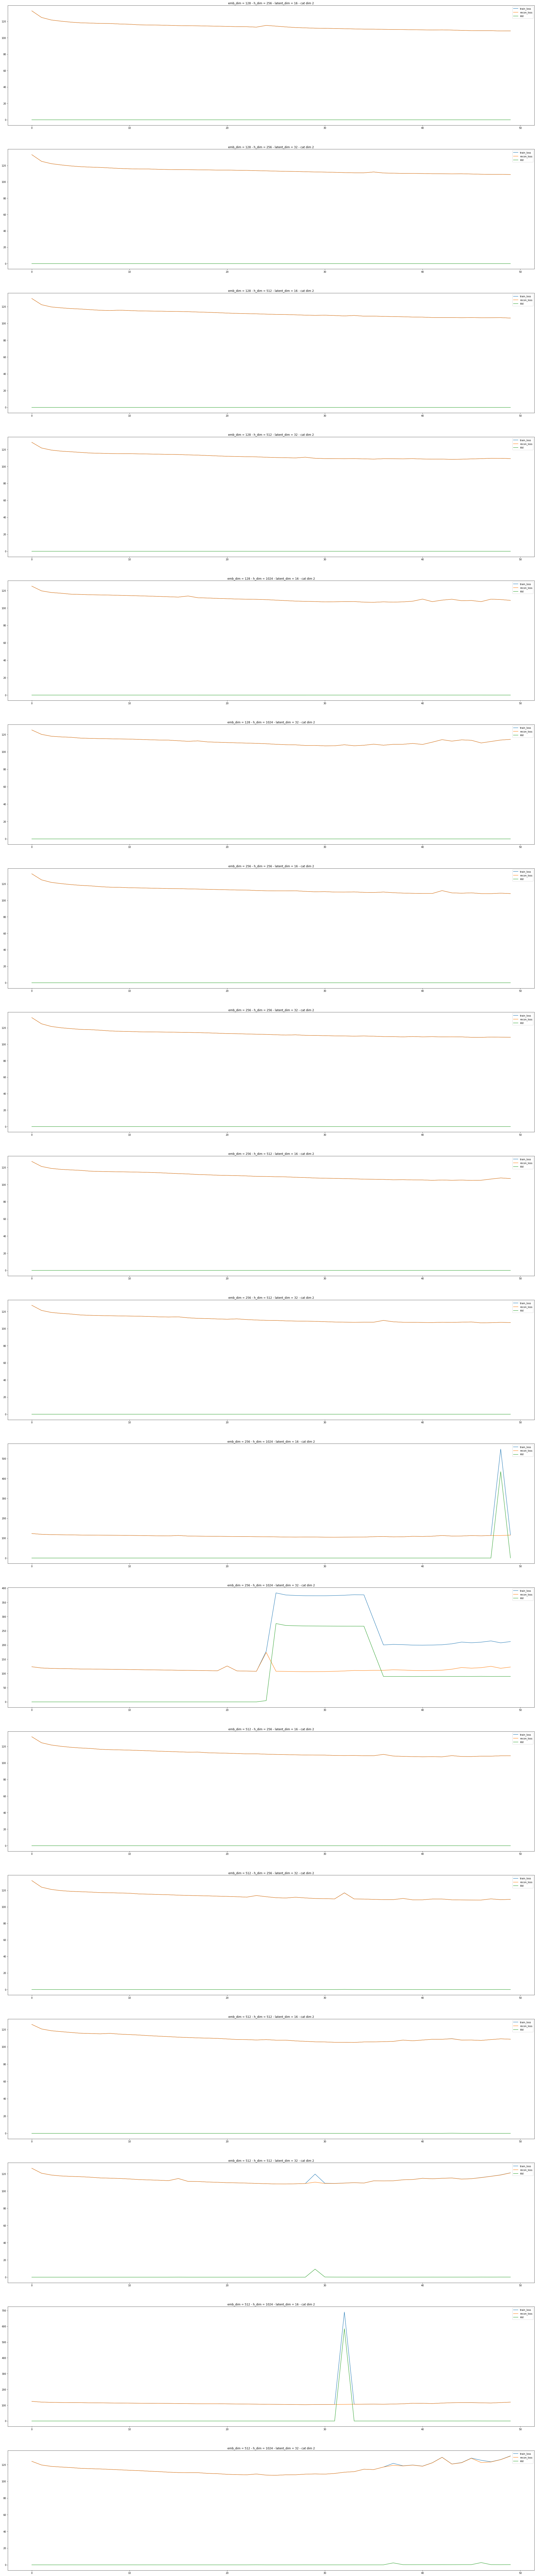

In [40]:
columns = ['emb_dim', 'h_dim', 'latent_dim', 'categorical_dim']
bc_df = result_df[result_df['activation'] == 'bc']

num_groups = len(bc_df.groupby(columns))
fig, axs = plt.subplots(num_groups, 1, figsize=(40, 200))
i = 0
for group, group_df in bc_df.groupby(columns):

    plot_df = group_df.sort_values('current_epoch').reset_index(drop=True)
    plot_df[['train_loss', 'recon_loss', 'kld']].plot(label='train_loss', ax = axs[i])
    #axs[i].plot(plot_df['train_loss'], label='train_loss', color='green')
    #axs[i].plot(plot_df['train_loss'], label='recon_loss', color='steelblue')
    #axs[i].plot(plot_df['train_loss'], label='kld', color='purple')
    title = f"emb_dim = {group[0]} - h_dim = {group[1]} - latent_dim = {group[2]} - cat dim {group[3]}"
    axs[i].set_title(title)
    i = i + 1


    #plot_df['train_loss'].plot()
    #plot_df['recon_loss'].plot()
    #plot_df['kld'].plot()
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

#plt.show()

In [34]:
ti

TypeError: sequence item 0: expected str instance, int found